<a href="https://colab.research.google.com/github/hitanshu5/ML-LAB/blob/main/MLEXP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline

In [ ]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(init="random",n_clusters = 3,n_init = 10, max_iter = 300, random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [ ]:
kmeans.n_iter_

2

In [ ]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

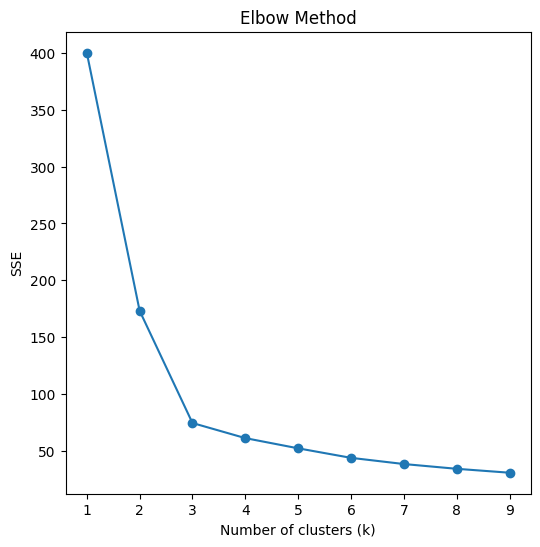

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="SSE")
plt.title(label="Elbow Method")
plt.show()

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [ ]:
silhouette_coef = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features,kmeans.labels_)
  silhouette_coef.append(score)

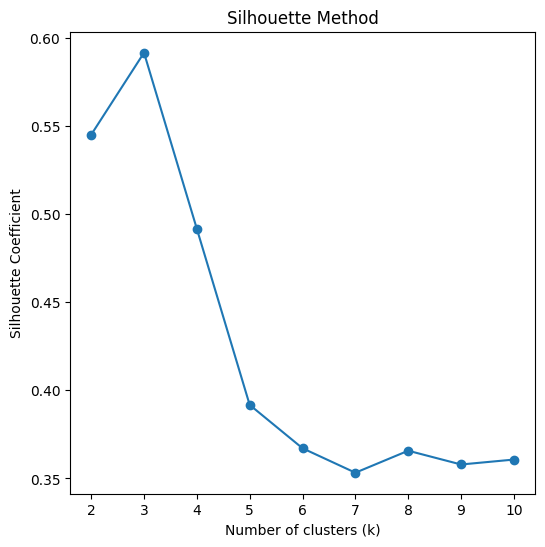

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_coef, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="Silhouette Coefficient")
plt.title(label="Silhouette Method")
plt.show()

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

r = urllib.request.urlretrieve(full_download_url, archive_name)

tar = tarfile.open(archive_name,"r:gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7ac5cc197100>>

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)
true_label_names =np.genfromtxt(labels_file, delimiter=",", usecols=(1, ), skip_header=1, dtype= "str")

In [ ]:
data[:5,:3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
n_clusters = len(label_encoder.classes_)

In [ ]:
preprocessor = Pipeline([("scaler",MinMaxScaler()),("pca",PCA(n_components=2,random_state=42)),])

In [ ]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [ ]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe['preprocessor'].transform(data)

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
numeric_columns = train.select_dtypes(include=['int', 'float']).columns
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].mean())


In [ ]:
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])

In [ ]:
features = train[["Age","Sex","Pclass"]].values
kmeans = KMeans(init="random",n_clusters = 3,n_init = 10, max_iter = 300, random_state=42)
kmeans.fit(features)


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[30.27293716,  0.66796875,  2.35351562],
       [14.64575758,  0.58441558,  2.57142857],
       [51.20945946,  0.67567568,  1.74324324]])

In [ ]:
kmeans.inertia_

30223.69552092301

In [ ]:
kmeans = KMeans(init="random",n_clusters = 2,n_init = 10, max_iter = 300, random_state=42)
kmeans.fit(features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[23.83752107,  0.64481707,  2.48628049],
       [46.06170213,  0.65531915,  1.81276596]])

In [ ]:
kmeans.inertia_

65747.01299317316

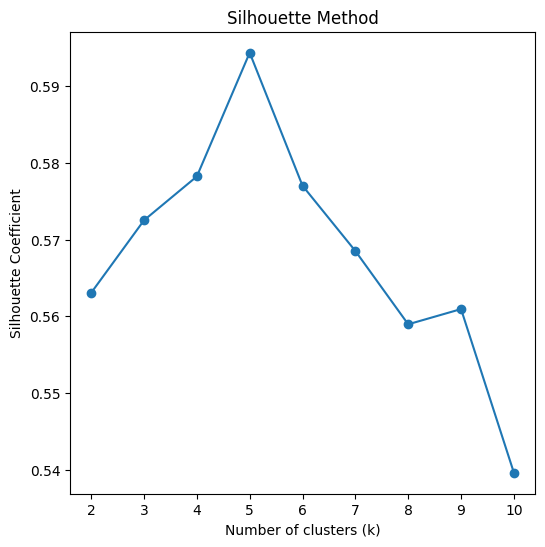

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
silhouette_coef = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coef.append(score)

plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_coef, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="Silhouette Coefficient")
plt.title(label="Silhouette Method")
plt.show()

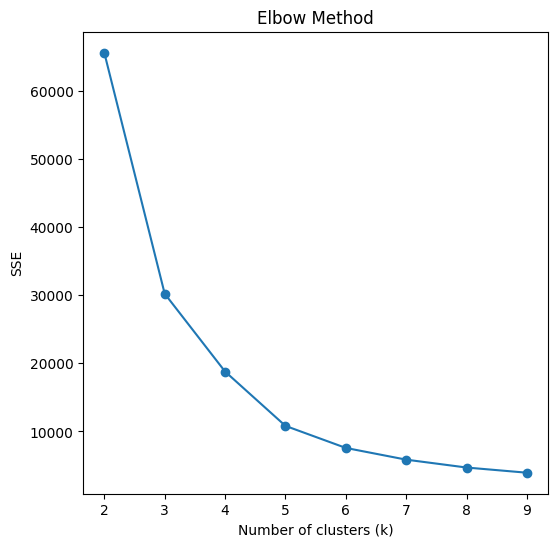

In [ ]:
list_k = list(range(2, 10))
sse = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="SSE")
plt.title(label="Elbow Method")
plt.show()
